# Decoding MIE: A Novel Dataset Approach Using Topic Extraction and Affiliation Parsing

In this section, we provide detailed descriptions of key fields within the dataset. These descriptions will help users better understand the structure and content of the dataset, making it easier to navigate and utilize for research or analysis purposes. The dataset was generated through a novel approach that leverages advanced techniques such as topic extraction and affiliation parsing to provide comprehensive metadata for each article.

This field-level detail allows for a comprehensive understanding of the dataset and highlights its utility for a wide range of analyses, including research trends, author collaboration networks, and geographic distribution of academic contributions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.config import OUTPUT_DIR

# Load Dataset

In [2]:
from src.dataset import load_dataset_mie
data =  load_dataset_mie()

Convert json to pandas dataframe:

In [3]:
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4606 entries, 0 to 4605
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   title                  4606 non-null   object
 1   year                   4606 non-null   object
 2   journal_issn           4606 non-null   object
 3   language               4606 non-null   object
 4   abstract               4606 non-null   object
 5   doi                    1646 non-null   object
 6   pmid                   4606 non-null   object
 7   citation_count         4606 non-null   int64 
 8   IOSPressVolume         4606 non-null   object
 9   publication_type       4606 non-null   object
 10  authors                4606 non-null   object
 11  keywords               4606 non-null   object
 12  topics                 4606 non-null   object
 13  affiliation_countries  4606 non-null   object
 14  affiliations           4606 non-null   object
dtypes: int64(1), object(1

# DOI

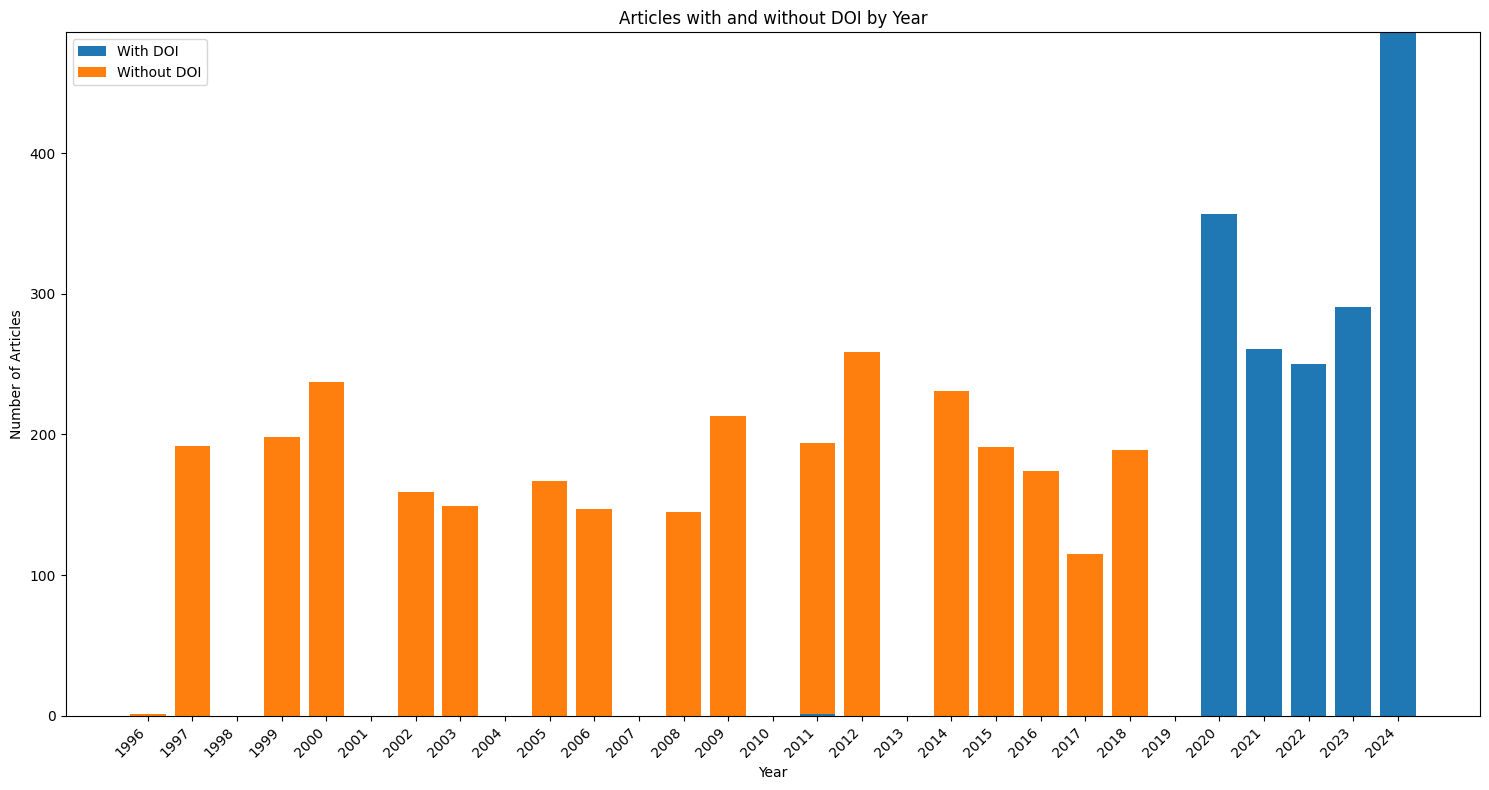

In [4]:
# Convert 'year' to numeric type
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Create boolean columns for articles with and without DOI
df['has_doi'] = df['doi'].notna()
df['no_doi'] = df['doi'].isna()


# # Create boolean columns for articles with and without DOI
# df['has_doi'] = df['doi'].str.strip() != ""
# df['no_doi'] = df['doi'].str.strip() == ""

# Get the range of years
min_year = df['year'].min()
max_year = df['year'].max()
all_years = range(int(min_year), int(max_year) + 1)

# Create a DataFrame with all years
all_years_df = pd.DataFrame({'year': all_years})

# Merge with the grouped data
grouped = df.groupby('year').agg({
    'has_doi': 'sum',
    'no_doi': 'sum'
}).reset_index()
grouped = all_years_df.merge(grouped, on='year', how='left').fillna(0)

# Step 4: Create stacked bar chart
plt.figure(figsize=(15, 8))
plt.bar(grouped['year'], grouped['has_doi'], label='With DOI')
plt.bar(grouped['year'], grouped['no_doi'], bottom=grouped['has_doi'], label='Without DOI')

plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Articles with and without DOI by Year')
plt.legend()

# Rotate x-axis labels
plt.xticks(grouped['year'], rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show & save the plot
plt.savefig(OUTPUT_DIR  / "Articles with and without DOI by Year.png")
plt.show()

# Authors

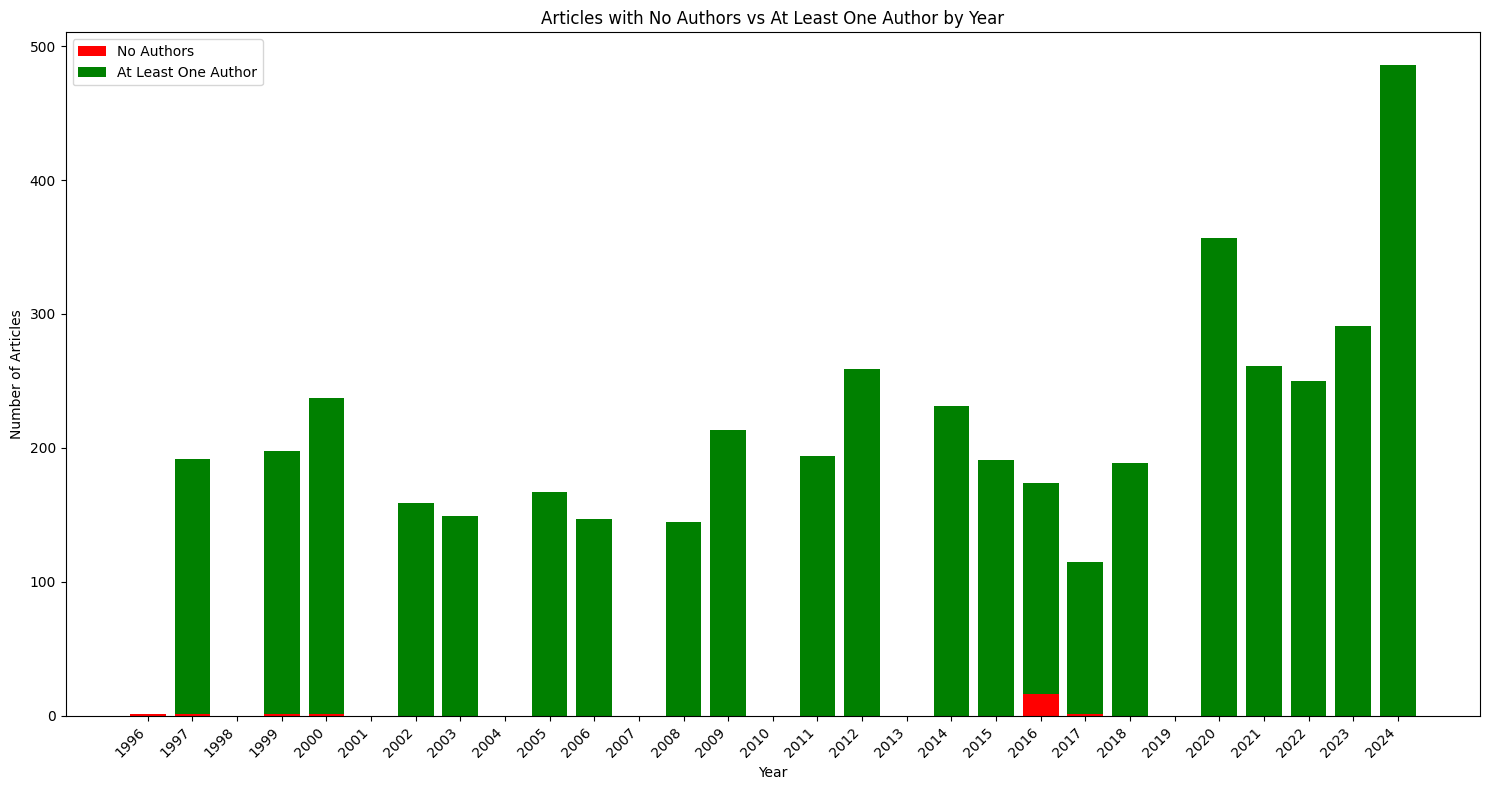

In [5]:
# Step 3: Data manipulation
# Convert 'year' to numeric type
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Create boolean columns for articles with and without authors
df['no_authors'] = df['authors'].apply(lambda x: len(x) == 0)
df['has_authors'] = df['authors'].apply(lambda x: len(x) > 0)

# Get the range of years
min_year = df['year'].min()
max_year = df['year'].max()
all_years = range(int(min_year), int(max_year) + 1)

# Create a DataFrame with all years
all_years_df = pd.DataFrame({'year': all_years})

# Group by year and count articles with and without authors
grouped = df.groupby('year').agg({
    'no_authors': 'sum',
    'has_authors': 'sum'
}).reset_index()

# Merge with all years
grouped = all_years_df.merge(grouped, on='year', how='left').fillna(0)

# Step 4: Create stacked bar chart
plt.figure(figsize=(15, 8))
plt.bar(grouped['year'], grouped['no_authors'], label='No Authors', color='red')
plt.bar(grouped['year'], grouped['has_authors'], bottom=grouped['no_authors'], label='At Least One Author', color='green')

plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Articles with No Authors vs At Least One Author by Year')
plt.legend()

# Rotate x-axis labels
plt.xticks(grouped['year'], rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show & save the plot
plt.savefig(OUTPUT_DIR  / "Articles with No Authors vs At Least One Author by Year.png")
plt.show()

# language

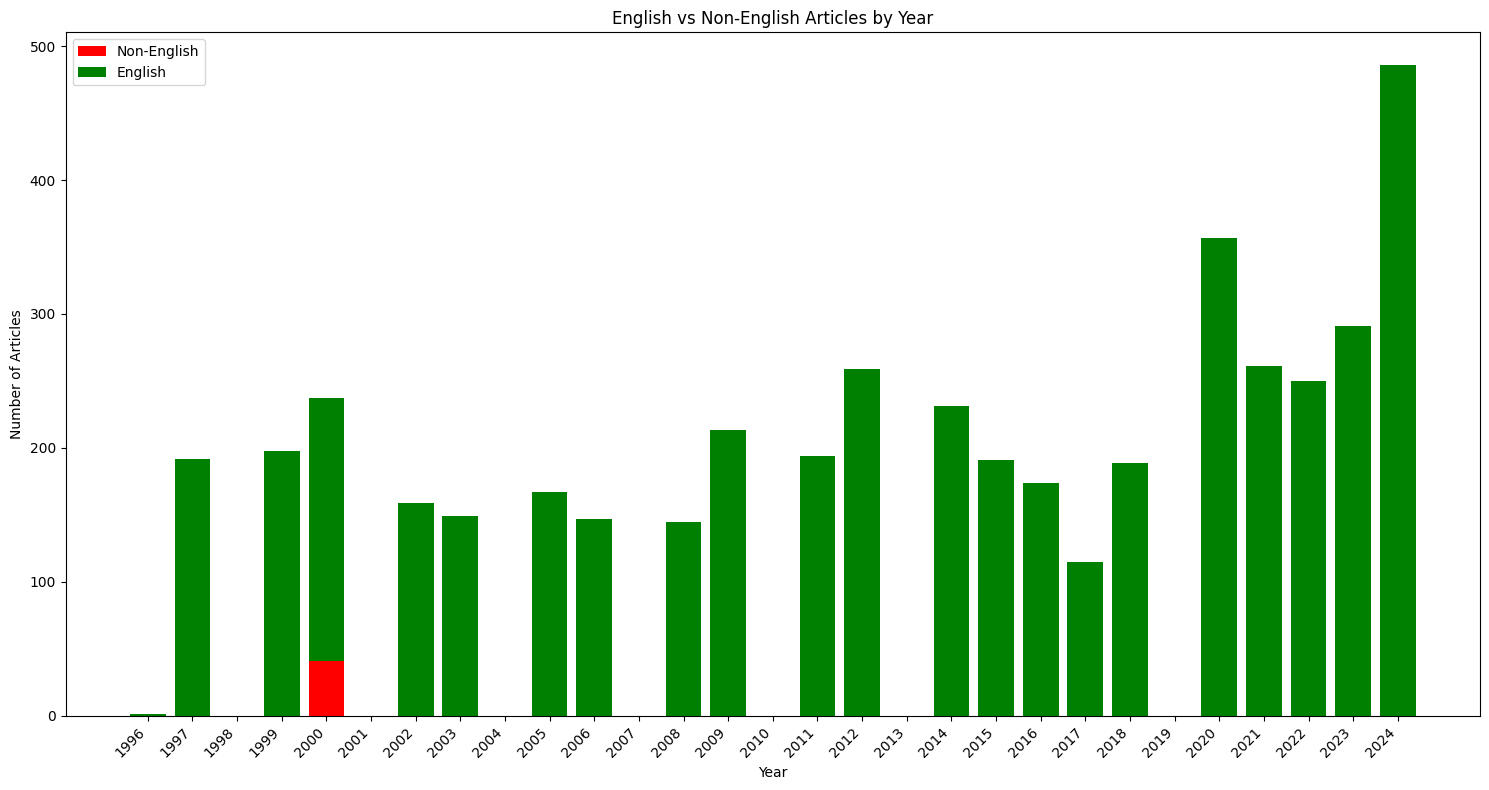

In [6]:
# Convert 'year' to numeric type
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Create boolean columns for English and non-English articles
df['is_english'] = df['language'].str.lower() == 'eng'
df['non_english'] = df['language'].str.lower() != 'eng'

# Get the range of years
min_year = df['year'].min()
max_year = df['year'].max()
all_years = range(int(min_year), int(max_year) + 1)

# Create a DataFrame with all years
all_years_df = pd.DataFrame({'year': all_years})

# Group by year and count English and non-English articles
grouped = df.groupby('year').agg({
    'is_english': 'sum',
    'non_english': 'sum'
}).reset_index()

# Merge with all years
grouped = all_years_df.merge(grouped, on='year', how='left').fillna(0)

# Step 4: Create stacked bar chart
plt.figure(figsize=(15, 8))
plt.bar(grouped['year'], grouped['non_english'], label='Non-English', color='red')
plt.bar(grouped['year'], grouped['is_english'], bottom=grouped['non_english'], label='English', color='green')

plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('English vs Non-English Articles by Year')
plt.legend()

# Rotate x-axis labels
plt.xticks(grouped['year'], rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show & save the plot
plt.savefig(OUTPUT_DIR  / "English vs Non-English Articles by Year.png")
plt.show()

# Affiliation Country

In [7]:
# Count articles where affiliation_countries is empty or null
empty_affiliations_count = df[df['affiliation_countries'].apply(lambda x: len(x) == 0)].shape[0]

print(f"Number of articles with empty or null affiliation_countries: {empty_affiliations_count}")


Number of articles with empty or null affiliation_countries: 32


In [8]:
# Function to compare counts
def count_mismatch(row):
    affiliation_countries_count = len(row['affiliation_countries']) if isinstance(row['affiliation_countries'], list) else 0
    affiliations_count = len(row['affiliations']) if isinstance(row['affiliations'], list) else 0
    return affiliation_countries_count != affiliations_count

# Count articles where affiliation_countries count mismatches affiliations count
mismatch_count = df[df.apply(count_mismatch, axis=1)].shape[0]

# Calculate total number of articles
total_articles = df.shape[0]

# Calculate percentage of mismatched articles
mismatch_percentage = (mismatch_count / total_articles) * 100 if total_articles > 0 else 0

print(f"Number of articles with mismatched affiliation counts: {mismatch_count}")
print(f"Total number of articles: {total_articles}")
print(f"Percentage of articles with mismatched affiliation counts: {mismatch_percentage:.2f}%")

# If you want to see which articles have mismatches
mismatched_articles = df[df.apply(count_mismatch, axis=1)]
print("\nArticles with mismatched affiliation counts:")
print(mismatched_articles[['title', 'affiliation_countries', 'affiliations']])


Number of articles with mismatched affiliation counts: 1564
Total number of articles: 4606
Percentage of articles with mismatched affiliation counts: 33.96%

Articles with mismatched affiliation counts:
                                                  title  \
1608  The Presence of eHealth Support for Childhood ...   
1609  Mapping of Health Care Providers for People wi...   
1610  Improving Patient Experience in a Children's H...   
1612  Developing an eHealth Tool to Support Patient ...   
1613  A Personalized Risk Stratification Platform fo...   
...                                                 ...   
4595  Technological Literacy as a Framework for Heal...   
4601  Synthetic Data Generation in Hematology - Pavi...   
4602  Protocol for a Validation Study of an Ontology...   
4603  Key Research Areas for Building and Deploying ...   
4605  Incorrect and Sex-Inconsistent Mapping of Diso...   

                               affiliation_countries  \
1608                            

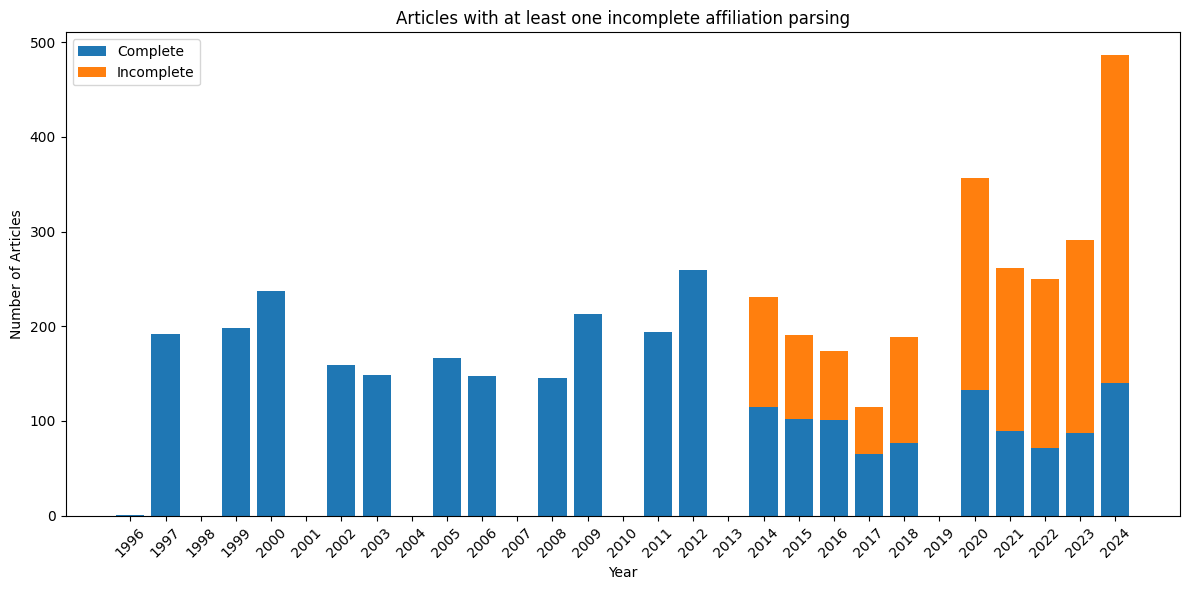

Total number of articles: 4606
Number of articles with Incomplete affiliation parsing counts: 1564
Percentage of articles with Incomplete affiliation parsing counts: 33.96%


In [9]:
# Add mismatch column
df['mismatch'] = df.apply(count_mismatch, axis=1)

# Convert year to numeric, assuming it's always a valid year
df['year'] = pd.to_numeric(df['year'])

# Group by year and count mismatches
yearly_counts = df.groupby('year')['mismatch'].value_counts().unstack(fill_value=0)

# Ensure all years between start and end are included
all_years = range(int(df['year'].min()), int(df['year'].max()) + 1)
yearly_counts = yearly_counts.reindex(all_years, fill_value=0)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

bottom = np.zeros(len(yearly_counts))

for mismatch, mismatch_data in yearly_counts.items():
    ax.bar(yearly_counts.index, mismatch_data, bottom=bottom, 
           label='Incomplete' if mismatch else 'Complete')
    bottom += mismatch_data

ax.set_xlabel('Year')
ax.set_ylabel('Number of Articles')
ax.set_title('Articles with at least one incomplete affiliation parsing')
ax.legend()

plt.xticks(yearly_counts.index, rotation=45)
plt.tight_layout()
# Show & save the plot
plt.savefig(OUTPUT_DIR  / "Articles with at least one incomplete affiliation parsing.png")
plt.show()

# Print some statistics
total_articles = len(df)
mismatch_count = df['mismatch'].sum()
mismatch_percentage = (mismatch_count / total_articles) * 100

print(f"Total number of articles: {total_articles}")
print(f"Number of articles with Incomplete affiliation parsing counts: {mismatch_count}")
print(f"Percentage of articles with Incomplete affiliation parsing counts: {mismatch_percentage:.2f}%")
